In [337]:
# import modules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rc
from matplotlib import colors
import pandas as pd
import math
%matplotlib inline

In [338]:
#Customise figure style 
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
rc('font',size=9)
rc('ytick.major',pad=5)
rc('xtick.major',pad=5)
padding = 8

#ColourMap
ColourMap = cm.inferno_r

In [339]:
#folder location 
Folder = "/home/jrs17/Dakota_Results/SM/"
Files = [Folder+'SM_test1'] #,Folder+'Like_4',Folder+'Like_5']

/home/jrs17/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/jrs17/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


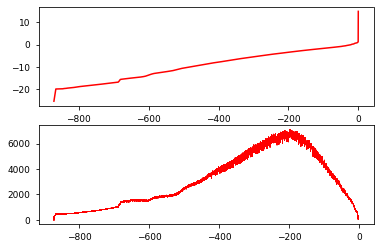

871.6


<Figure size 432x288 with 0 Axes>

In [340]:
#Load files and extract results
#Profile & Concentrations
for i, FileName in enumerate(Files):
    #create blank figure
    fig1 = plt.figure(1)
    plt.figure(1,figsize=(8,4))
    
    #set up axis
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)
    #ax3 = plt.subplot(313)
    
    #####################
    #Modelled topography
    #####################
    #First load morphology through time 
    #declare the file and the axis
    ProfileName = FileName+"_ShoreProfile.xz"
    #ProfileName = FileName+"_EnsembleShoreProfile.xz"
    f = open(ProfileName,'r')
    MorphLines = f.readlines()
    NoLines = len(MorphLines)
    StartTime = float(MorphLines[2].strip().split(" ")[0])
    EndTime = float(MorphLines[-1].strip().split(" ")[0])
    f.close()
    
    #Get last cliff position
    LastOutput = MorphLines[-1].strip().split(" ")
    LastProfile = np.array(LastOutput[2:],dtype="float64")
    LCPosition = float(LastOutput[3])
    LastProfile = (LCPosition-LastProfile)*-1
    
    #Read morphology
    #Get z values
    HeaderLine = MorphLines[0].strip().split(" ")
    CliffHeight = float(HeaderLine[0])  #cliff height = 0? - need to change output to write file
    MinElev = float(HeaderLine[1])
    dZ = float(HeaderLine[2])
    NValues = (int)((CliffHeight-MinElev)/dZ+1)
    Z = np.linspace(CliffHeight, MinElev, NValues)
    Z_LastProfile = np.linspace(CliffHeight, MinElev, len(LastProfile))
    
    ########################
    #Modelled CRN
    #########################
    #Second load CRN concentrations through time
    #declare the file and the axis
    ProfileName = FileName+"Concentrations.xn"
    #ProfileName = FileName+"_EnsembleConcentration.xn"
    f = open(ProfileName,'r')
    NLines = f.readlines()
    f.close()
    
    #Only plot every 100 years
    PlotTime = 8000
    PlotInterval = 10 #100
    
    #plot topo profile axis 1
    ax1.plot(LastProfile,Z_LastProfile,'-',color='red',lw=1.5)
    
    #Get header and set up X coord
    for j in range(1,NoLines-1):
        N10Line = (NLines[-1].strip().split(" "))
        N10 = np.array(N10Line[2:],dtype="float64")
        X2 = np.arange(0,len(N10)) #*0.1
        
        #Normalise so cliff position = 0m
        X2 = (LCPosition-X2)*-1
        mask = [N10!=N10[-1]]
        N10 = N10[mask]
        X2 = X2[mask]
        
        #plot CRN profile axis 2
        ax2.plot(X2,N10,'-',color='red',lw=0.5)
        

#edit figure
#ax1.set_xlim(-300,5)
#ax2.set_xlim(-300,5)
#ax1.set_ylim(-10,5)
#ax2.set_ylim(0,9000)

#show plot
fig1 = plt.gcf()
plt.show()
plt.draw()
#fig1.savefig('Final_300.png',dpi=300)

print(LCPosition)  

<Figure size 432x288 with 0 Axes>

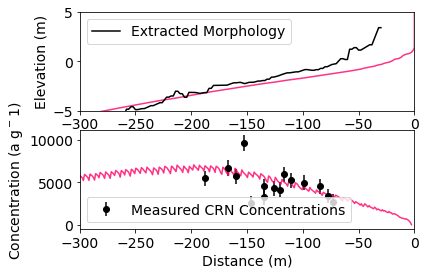

<Figure size 432x288 with 0 Axes>

In [348]:
#figure 2 adding measured data 
fig2 = plt.figure(2)
plt.figure(1,figsize=(6,4))

ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

#plot modelled data
ax1.plot(LastProfile,Z_LastProfile,'-', color=[1.,0.,0.4,0.8], lw=1.5)  #color=ColourMap(float(i)/float(NumFiles)),lw=1.5)
ax2.plot(X2,N10,color=[1.,0.,0.4,0.8],lw=1.5)

#Reading in measured data 
#measured CRN data 
CRNFile = "SM_CRN.data"
X,CRN,Error=np.loadtxt(CRNFile,unpack=True,skiprows=1,usecols=(1,2,3),delimiter=" ")

#Normalised x positions
NormalisedX = 0 - X

ax2.errorbar(NormalisedX,CRN,fmt='o',yerr=Error,c='k',label='Measured CRN Concentrations')
ax2.scatter(NormalisedX,CRN,s=0.1)

#measured shore profile 
ExProfileName = "SM_profile.txt" #Swath_Profile_SY.txt"   #CB_profile.txt"
Xprof, Zprof = np.loadtxt(ExProfileName,unpack=True,skiprows=1,usecols=(0,1))
Xprof = 0 - Xprof

ax1.plot(Xprof,Zprof,'k-',lw=1.5,label='Extracted Morphology')

#axis labels
ax1.set_ylabel("Elevation (m)")
ax2.set_ylabel("Concentration (a g$^-1$)")
ax2.set_xlabel("Distance (m)")

ax1.legend(loc='upper left') #, numpoint=1)
ax2.legend(loc='lower left') #, numpoint=1)

#axis limits
#xmin, xmax = ax1.get_xlim()
ax1.set_xlim(-300,0)
ax2.set_xlim(-300,0)
ax1.set_ylim(-5,5)
#ax2.set_ylim(0,9000)

        
fig2 = plt.gcf()
plt.show()
plt.draw()
#fig2.savefig('SY_11_model.png',dpi=300)

/home/jrs17/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/jrs17/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


<Figure size 432x288 with 0 Axes>

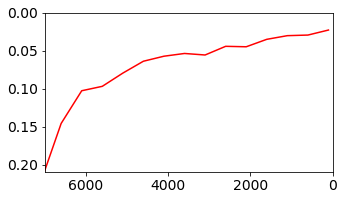

<Figure size 432x288 with 0 Axes>

In [363]:
#adding 3rd panel with retreat rate & RSL
# Customise figure style #
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
rc('font',size=14)
rc('ytick.major',pad=3)
rc('xtick.major',pad=3)
padding = 1
#create blank figure
fig3 = plt.figure(3)
plt.figure(1,figsize=(5,3))
    
#set up axis
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)

#plot measured data
ax1.plot(Xprof,Zprof,'r-',lw=1.5,label='Extracted Morphology')
ax1.errorbar(NormalisedX,CRN,fmt='D',ms=5,mew=0,yerr=Error,color=(0., 0., 0., 1),lw=1,label='Scalby $^{10}$Be') 

for i, FileName in enumerate(Files):
    
    #First load morphology through time 
    #declare the file and the axis
    ProfileName = FileName+"_ShoreProfile.xz"
    f = open(ProfileName,'r')
    MorphLines = f.readlines()
    NoLines = len(MorphLines)
    StartTime = float(MorphLines[2].strip().split(" ")[0])
    EndTime = float(MorphLines[-1].strip().split(" ")[0])
    f.close()
    
    #Get last cliff position
    LastOutput = MorphLines[-1].strip().split(" ")
    LastProfile = np.array(LastOutput[2:],dtype="float64")
    LCPosition = float(LastOutput[3])
    LastProfile = (LCPosition-LastProfile)*-1
    
    #Read morphology
    #Get z values
    HeaderLine = MorphLines[0].strip().split(" ")
    CliffHeight = float(HeaderLine[0])  #cliff height = 0? - need to change output to write file
    MinElev = float(HeaderLine[1])
    dZ = float(HeaderLine[2])
    NValues = (int)((CliffHeight-MinElev)/dZ+1)
    Z = np.linspace(CliffHeight, MinElev, NValues)
    Z_LastProfile = np.linspace(CliffHeight, MinElev, len(LastProfile))
    
    #Second load CRN concentrations through time
    #declare the file and the axis
    ProfileName = FileName+"Concentrations.xn"
    f = open(ProfileName,'r')
    NLines = f.readlines()
    f.close()
    
    #Only plot every 100 years
    PlotTime = 8000
    PlotInterval = 10 #100
    
    #plot topo profile axis 1
    #ax1.plot(LastProfile,Z_LastProfile,'-',color=ColourMap(float(i)/float(NumFiles)),lw=1.5)
    ax1.plot(LastProfile,Z_LastProfile,'-',color='r',lw=1.5)
    
    #Get header and set up X coord
    for j in range(1,NoLines-1):
        N10Line = (NLines[-1].strip().split(" "))
        N10 = np.array(N10Line[2:],dtype="float64")
        X2 = np.arange(0,len(N10)) #*0.1
        
        #Normalise so cliff position = 0m
        X2 = (LCPosition-X2)*-1
        mask = [N10!=N10[-1]]
        N10 = N10[mask]
        X2 = X2[mask]
        
        #plot CRN profile axis 2
        ax2.plot(X2,N10,'-',color='red',lw=0.5)
        
#color=ColourMap(float(i)/float(NumFiles))

    ProfileName = FileName+"_ShoreProfile.xz"
    f = open(ProfileName,'r')
    MorphLines = f.readlines()
    NoLines = len(MorphLines)
    
    #create place holder for cliff position 
    Times = np.zeros(NoLines-1)
    XPos = np.zeros(NoLines-1)
    RSL = np.zeros(NoLines-1)
    
    #print(MorphLines[0])
    
    for j in range(1,NoLines):
        #extract each line
        Line = MorphLines[j].split(" ")
        #record the time to our array 
        Times[j-1] = float(Line[0])
        #RSL record
        RSL[j-1] = float(Line[1])
        #record the cliff position to array 
        XPos[j-1] = float(Line[2])
        
        
    if Times[0] == -9999:
        Times[0] = 8000.
    
    RSL = RSL[0::5]
    Times = Times[0::5]
    XPos = XPos[0::5]

    #Calculate retreat rates
    Rates = np.diff(XPos)/(Times[1]-Times[2])
    #print(Times[2], Times[1])

    #print(Rates)
    #print(Rates.size)

    #plot retreat rates axis 3
    #ax1.plot(Times[1:],Rates,'-',color=ColourMap(float(i)/float(NumFiles)),label='Retreat Rate')
    ax3.plot(Times[1:],Rates,'-',color='r',label='Retreat Rate')

    
#ax1.plot(Xprof,Zprof,'k-',lw=1.5,label='Extracted Morphology')
#ax1.plot(Xprof2,Zprof2,'k-',lw=1.5,label='Extracted Morphology 2')

#axis labels
#ax1.set_ylabel("Elevation (m)")
#ax2.set_ylabel("Concentration (a g$^-1$)")
#ax2.set_xlabel("Distance (m)")
#ax3.set_xlabel("Age (BP)")
#ax3.set_ylabel("Retreat Rate (m y$^-1$)")

#axid legend
#ax1.legend(loc='upper left') #, numpoint=1)
#ax2.legend(loc='lower left') #, numpoint=1)
##ax3.legend(loc='lower right')
#ax4.legend(loc='center right')


#axis limits
#axis1 topography
#ax1.set_xlim(-400,5)
#ax1.set_ylim(-10,5)
#axis 2 crn
#ax2.set_xlim(-300,5)
#axis 3 retreat rates 
#xmin, xmax = ax3.get_xlim()
#ax3.set_xlim(8000,0)
#ax3.set_ylim(0.35,0)

#plot RSL axis 3 with different axis
#ax4 = ax3.twinx()
#ax4.set_ylabel("RSL (m)")
#ax4.plot(Times,RSL,'r--',label='Bideford RSL')

#axis 4 RSL - on same panel as retreat rates 
#ax4.set_xlim(7000,0)
#ax4.set_ylim(-10,0)

#plot and save figure
fig3 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
#fig3.savefig('SM_RR.png',dpi=300)
#fig3.savefig('RR_FR_Yplot.svg',dpi=300)


In [ ]:
#plot individual panels 
# Customise figure style #
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
rc('font',size=14)
rc('ytick.major',pad=3)
rc('xtick.major',pad=3)
padding = 1
#create blank figure
fig3 = plt.figure(3)
plt.figure(1,figsize=(5,3))
    
#set up axis
ax1 = plt.subplot(111)

#plot measured data
#ax1.plot(Xprof,Zprof,'r-',lw=1.5,label='Extracted Morphology')
#ax1.errorbar(NormalisedX,CRN,fmt='D',ms=5,mew=0,yerr=Error,color=(0., 0., 0., 1),lw=1,label='Scalby $^{10}$Be') 

for i, FileName in enumerate(Files):  
    #First load morphology through time 
    #declare the file and the axis
    ProfileName = FileName+"_ShoreProfile.xz"
    f = open(ProfileName,'r')
    MorphLines = f.readlines()
    NoLines = len(MorphLines)
    StartTime = float(MorphLines[2].strip().split(" ")[0])
    EndTime = float(MorphLines[-1].strip().split(" ")[0])
    f.close()
    
    #Get last cliff position
    LastOutput = MorphLines[-1].strip().split(" ")
    LastProfile = np.array(LastOutput[2:],dtype="float64")
    LCPosition = float(LastOutput[3])
    LastProfile = (LCPosition-LastProfile)*-1
    
    #Read morphology
    #Get z values
    HeaderLine = MorphLines[0].strip().split(" ")
    CliffHeight = float(HeaderLine[0])  #cliff height = 0? - need to change output to write file
    MinElev = float(HeaderLine[1])
    dZ = float(HeaderLine[2])
    NValues = (int)((CliffHeight-MinElev)/dZ+1)
    Z = np.linspace(CliffHeight, MinElev, NValues)
    Z_LastProfile = np.linspace(CliffHeight, MinElev, len(LastProfile))
    
    #Second load CRN concentrations through time
    #declare the file and the axis
    ProfileName = FileName+"Concentrations.xn"
    f = open(ProfileName,'r')
    NLines = f.readlines()
    f.close()
    
    #Only plot every 100 years
    PlotTime = 8000
    PlotInterval = 10 #100
    
    #plot topo profile axis 1
    #ax1.plot(LastProfile,Z_LastProfile,'-',color=ColourMap(float(i)/float(NumFiles)),lw=1.5)
    #ax1.plot(LastProfile,Z_LastProfile,'-',color='r',lw=1.5)
    
    #Get header and set up X coord
    for j in range(1,NoLines-1):
        N10Line = (NLines[-1].strip().split(" "))
        N10 = np.array(N10Line[2:],dtype="float64")
        X2 = np.arange(0,len(N10)) #*0.1
        
        #Normalise so cliff position = 0m
        X2 = (LCPosition-X2)*-1
        mask = [N10!=N10[-1]]
        N10 = N10[mask]
        X2 = X2[mask]
        
        #plot CRN profile axis 2
        #ax1.plot(X2,N10,'-',color='red',lw=0.5)
        
#color=ColourMap(float(i)/float(NumFiles))

    ProfileName = FileName+"_ShoreProfile.xz"
    f = open(ProfileName,'r')
    MorphLines = f.readlines()
    NoLines = len(MorphLines)
    
    #create place holder for cliff position 
    Times = np.zeros(NoLines-1)
    XPos = np.zeros(NoLines-1)
    RSL = np.zeros(NoLines-1)
    
    #print(MorphLines[0])
    
    for j in range(1,NoLines):
        #extract each line
        Line = MorphLines[j].split(" ")
        #record the time to our array 
        Times[j-1] = float(Line[0])
        #RSL record
        RSL[j-1] = float(Line[1])
        #record the cliff position to array 
        XPos[j-1] = float(Line[2])
        
        
    if Times[0] == -9999:
        Times[0] = 8000.
    
    RSL = RSL[0::5]
    Times = Times[0::5]
    XPos = XPos[0::5]
   
    
    #return Times, XPos, RSL

    #print(XPos)
    #print(XPos.size)
    #print(Times)
    #print(Times.size)
    #print(RSL)
    #print(RSL.size)

    #Calculate retreat rates
    Rates = np.diff(XPos)/(Times[1]-Times[2])
    #print(Times[2], Times[1])

    #print(Rates)
    #print(Rates.size)

    #plot retreat rates axis 3
    #ax1.plot(Times[1:],Rates,'-',color=ColourMap(float(i)/float(NumFiles)),label='Retreat Rate')
    ax1.plot(Times[1:],Rates,'-',color='r',label='Retreat Rate')

    
#ax1.plot(Xprof,Zprof,'k-',lw=1.5,label='Extracted Morphology')
#ax1.plot(Xprof2,Zprof2,'k-',lw=1.5,label='Extracted Morphology 2')

ax1.set_xlim(7000,0)
#ax4.set_xlim(7000,0)
#ax1.set_ylim(0.03,0.015)
ax1.set_ylim(0.21,0)
#plt.yscale("log")
#plt.grid()

fig3 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fig3.savefig('SM_RR.png',dpi=300)
#fig3.savefig('RR_FR_Yplot.svg',dpi=300)